###k-means clustering

####0. setting

In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


####1. data load

In [72]:
data = np.load("/content/drive/MyDrive/ml/k_means.data.npy")

In [73]:
print(data.shape)

(300, 2)


In [74]:
x = data[:, 0]
y = data[:, 1]

####2. k-means algorithm

In [75]:
#euclidean distance 함수 정의
def distance(x, y):
  result = sum([(xx-yy)**2 for xx, yy in list(zip(x, y))])
  return result**0.5

In [76]:
def kmeans(data, k, seed=None, niter=30):
  label = np.zeros(len(data))
  x = data[:, 0]
  y = data[:, 1]
  Data = np.array(list(zip(x, y)))

  random.seed(221130)
  seed = sorted(random.sample(range(len(data)), k))


  #k개의 centroid 지정
  cx = []
  cy = []
  for a in range(k):
    cx.append(data[seed[a],0])
    cy.append(data[seed[a],1])
  centroid = list(zip(cx, cy))


  #k-means clustering
  for n in range(niter):
    for i in range(len(data)):
      d = np.zeros(k)
      for j in range(k):
        d[j] = distance(Data[i], centroid[j])
      cluster = np.argmin(d)
      label[i] = cluster
  
    for i in range(k):
      point = [ Data[j] for j in range(len(Data)) if label[j]==i ]
      centroid[i] = np.mean(point, axis=0)
    
  return centroid, label

####3. k-means clustering & plot clustered dataset

In [77]:
clusters, label = kmeans(data, 3)
clusters_x = clusters[0][0], clusters[1][0], clusters[2][0]
clusters_y = clusters[0][1], clusters[1][1], clusters[2][1]

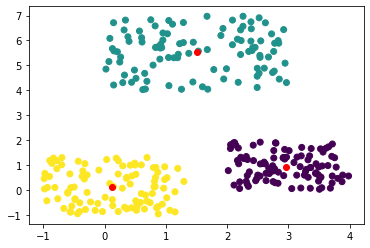

In [78]:
plt.scatter(x, y, c=label)
plt.scatter(clusters_x, clusters_y, c='red')
plt.savefig('/content/drive/MyDrive/ml/kmeans.png')